In [ ]:
#import libraries
from sklearn.datasets import load_sample_image
from sklearn.metrics import pairwise_distances_argmin
from sklearn.cluster import KMeans
%matplotlib inline
import matplotlib.pyplot as plt

#for plotting style
import seaborn as sns
import numpy as np
from sklearn.datasets.samples_generator import make_blobs



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


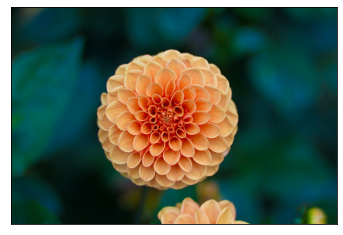

In [ ]:
china = load_sample_image("flower.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china); #16 million colors

In [ ]:
china.shape

(427, 640, 3)

In [ ]:
china

array([[[ 2, 19, 13],
        [ 3, 18, 13],
        [ 7, 20, 13],
        ...,
        [ 1, 77, 64],
        [ 0, 76, 64],
        [ 0, 75, 63]],

       [[ 1, 18, 12],
        [ 3, 18, 13],
        [ 7, 20, 13],
        ...,
        [ 0, 76, 64],
        [ 1, 74, 65],
        [ 1, 74, 65]],

       [[ 2, 17, 12],
        [ 6, 19, 12],
        [ 7, 20, 13],
        ...,
        [ 1, 74, 65],
        [ 1, 74, 67],
        [ 1, 74, 67]],

       ...,

       [[ 0, 46, 40],
        [ 1, 48, 40],
        [ 1, 47, 37],
        ...,
        [ 5, 44, 26],
        [ 6, 43, 26],
        [ 7, 44, 27]],

       [[ 0, 47, 41],
        [ 1, 48, 40],
        [ 1, 47, 37],
        ...,
        [ 6, 45, 27],
        [ 7, 44, 27],
        [ 7, 44, 27]],

       [[ 0, 47, 41],
        [ 1, 48, 40],
        [ 0, 46, 36],
        ...,
        [ 7, 46, 28],
        [ 8, 45, 28],
        [ 9, 43, 27]]], dtype=uint8)

In [ ]:
data = china / 255.0 #use 0...1 scale
data = data.reshape(427*640, 3)
data.shape

(273280, 3)

In [ ]:
data

array([[0.00784314, 0.0745098 , 0.05098039],
       [0.01176471, 0.07058824, 0.05098039],
       [0.02745098, 0.07843137, 0.05098039],
       ...,
       [0.02745098, 0.18039216, 0.10980392],
       [0.03137255, 0.17647059, 0.10980392],
       [0.03529412, 0.16862745, 0.10588235]])

In [ ]:
def plot_pixels(data, title, colors=None, N=10000):
  if colors is None:
    colors = data

    #choosing a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

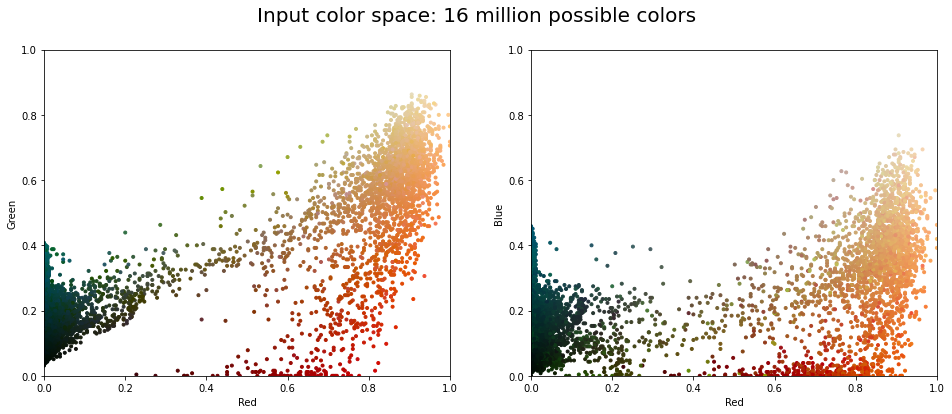

In [18]:
plot_pixels(data, title='Input color space: 16 million possible colors')

In [20]:
import warnings; warnings.simplefilter('ignore') # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]



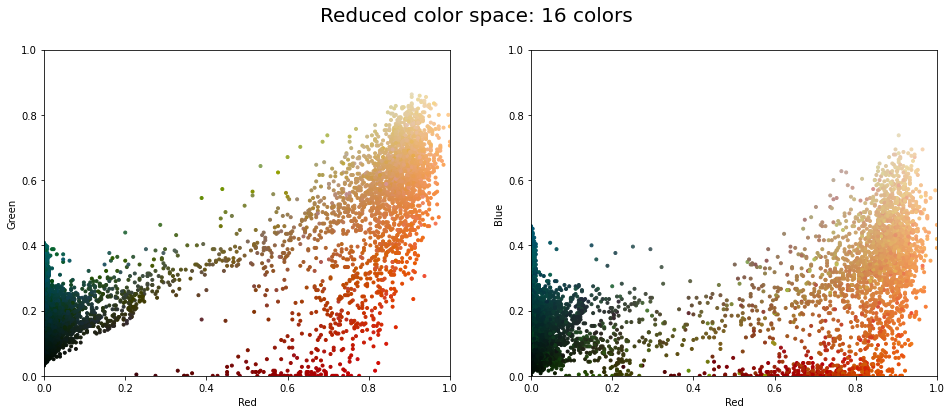

In [24]:
plot_pixels(data, title='Reduced color space: 16 colors')

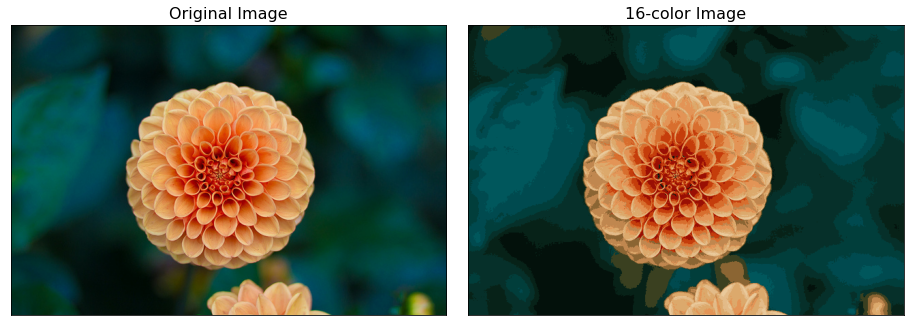

In [25]:
china_recolored = new_colors.reshape(china.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(china_recolored)
ax[1].set_title('16-color Image', size=16);
